In [1]:
!pip install tensorflow-gpu


     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 69.7 MB/s 


In [2]:
import tensorflow as tf

In [3]:
#checking the version of tensorflow installead.
#Version 2 is integrated with keras lib
print(tf.__version__)

2.8.0


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
# Now let's work  on  ANN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [11]:
# Initialising the ANN
classifier = Sequential()

In [12]:
# Adding the input layer 
#From above we can see that they are 11 units.Units are nothing but the no of input columns.
classifier.add(Dense(units=11,activation='relu'))

In [13]:
# Adding the  first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [14]:
# Adding the second hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units=6,activation='sigmoid'))

In [15]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#By default adam provides learning rate-0.01, if we want to change the learning see below
#import tensorflow
#opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#Early stoping
#when the results in below stops improving, this will stop excution
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [16]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 2s 3ms/step - loss: 1.6365 - accuracy: 0.7813 - val_loss: 1.1275 - val_accuracy: 0.7800
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 1.0380 - accuracy: 0.7733 - val_loss: 0.9111 - val_accuracy: 0.7868
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.9557 - accuracy: 0.7916 - val_loss: 0.8330 - val_accuracy: 0.7830
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.8073 - accuracy: 0.7688 - val_loss: 0.6758 - val_accuracy: 0.7675
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.6797 - accuracy: 0.7862 - val_loss: 0.5965 - val_accuracy: 0.7823
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.6281 - accuracy: 0.7886 - val_loss: 0.5855 - val_accuracy: 0.7637
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7895 - val_loss: 0.5231 - val_accuracy: 0.7902
Epoch 

In [17]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


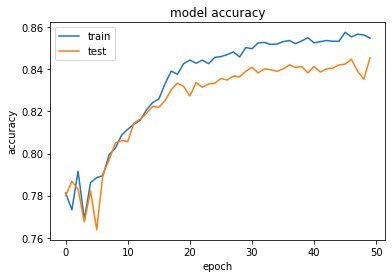

In [18]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

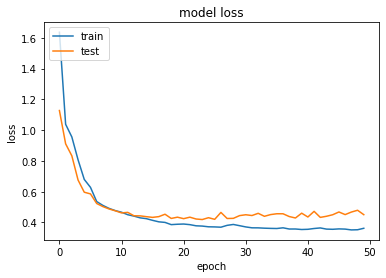

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1503,   92],
       [ 208,  197]])

In [22]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [23]:
score

0.85